<a href="https://colab.research.google.com/github/MochamadPhilliaWibowo/Machine-Learning-Class/blob/main/Tugas%20Week%206/Reproduce%20SKLearn%20Code/2_Affinity_Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Mochamad Phillia Wibowo

NIM : 1103204191

Kelas : Machine Learning (TK-44-G04)

Tugas 6 Affinity Propagation Clustering

In [9]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import metrics
import matplotlib.pyplot as plt

1. import numpy as np: Mengimpor modul numpy dengan alias np untuk operasi numerik.

2. from sklearn.cluster import KMeans: Mengimpor class KMeans dari modul cluster di scikit-learn untuk algoritme K-Means.

3. from sklearn.datasets import make_blobs: Mengimpor fungsi make_blobs dari modul datasets di scikit-learn untuk pembuatan sampel data berbentuk blobs.

4. from sklearn import metrics: Mengimpor modul metrics dari scikit-learn untuk evaluasi kinerja clustering.

5. import matplotlib.pyplot as plt: Mengimpor modul pyplot dari matplotlib untuk visualisasi data.

In [10]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=300, centers=centers, cluster_std=0.5, random_state=0
)

In [11]:
# Membuat algoritme Affinity Propagation
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

n_clusters_ = len(cluster_centers)

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="euclidean")
)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Estimated number of clusters: 3
Homogeneity: 0.852
Completeness: 0.852
V-measure: 0.852
Adjusted Rand Index: 0.894
Adjusted Mutual Information: 0.851
Silhouette Coefficient: 0.560


Output di atas adalah hasil evaluasi kinerja clustering menggunakan metrik-metrik tertentu. Berikut adalah penjelasan dari setiap metrik:

1. Estimated number of clusters: 3: Jumlah cluster yang diestimasi oleh algoritme clustering. Dalam kasus ini, algoritme K-Means mengestimasi bahwa terdapat 3 cluster dalam data.

2. Homogeneity: 0.852: Homogeneity score mengukur seberapa seragam setiap cluster hanya berisi anggota dari satu kelas. Nilai homogeneity yang mendekati 1 menunjukkan bahwa setiap cluster sangat seragam dalam hal anggota kelas yang dimilikinya. Dalam hal ini, nilai homogeneity adalah 0.852, yang menunjukkan tingkat homogenitas yang tinggi.

3. Completeness: 0.852: Completeness score mengukur seberapa lengkap semua anggota kelas yang sama ditempatkan dalam satu cluster. Nilai completeness yang mendekati 1 menunjukkan bahwa semua anggota kelas yang sama telah ditempatkan dalam satu cluster. Dalam hal ini, nilai completeness adalah 0.852, yang menunjukkan tingkat completeness yang tinggi.

4. V-measure: 0.852: V-measure adalah harmonic mean dari homogeneity dan completeness. Ini memberikan ukuran keseluruhan dari kualitas clustering. Nilai V-measure yang mendekati 1 menunjukkan kualitas clustering yang baik secara keseluruhan. Dalam hal ini, nilai V-measure adalah 0.852, yang menunjukkan bahwa clustering memiliki kualitas yang baik.

5. Adjusted Rand Index: 0.894: Adjusted Rand Index (ARI) adalah ukuran kesamaan antara clustering dan label asli data, disesuaikan untuk kesamaan acak. Nilai ARI yang mendekati 1 menunjukkan tingkat kesamaan yang tinggi antara clustering dan label asli. Dalam hal ini, nilai ARI adalah 0.894, yang menunjukkan tingkat kesamaan yang tinggi.

6. Adjusted Mutual Information: 0.851: Adjusted Mutual Information (AMI) adalah ukuran lain dari kesamaan antara clustering dan label asli data, disesuaikan untuk kesamaan acak. Nilai AMI yang mendekati 1 juga menunjukkan tingkat kesamaan yang tinggi antara clustering dan label asli. Dalam hal ini, nilai AMI adalah 0.851, yang menunjukkan tingkat kesamaan yang tinggi.

7. Silhouette Coefficient: 0.560: Silhouette Coefficient mengukur seberapa dekat setiap titik data dalam cluster dengan titik-titik lain dalam cluster tersebut dibandingkan dengan titik-titik di cluster lain. Nilai Silhouette Coefficient berkisar dari -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan clustering yang lebih baik. Dalam hal ini, nilai Silhouette Coefficient adalah 0.560, yang menunjukkan bahwa sebagian besar titik data berada dalam cluster yang sesuai, tetapi ada sedikit overlapping antara cluster.

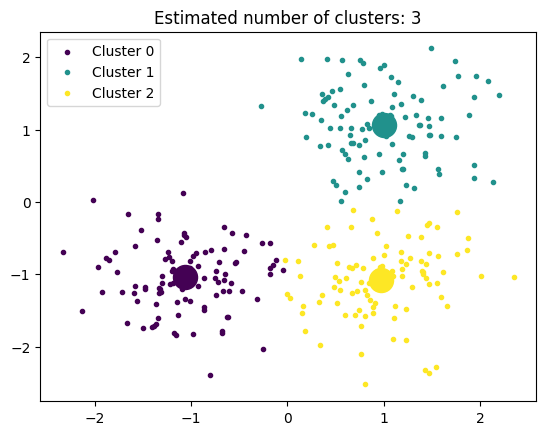

In [12]:
plt.figure(1)
plt.clf()

colors = plt.cm.viridis(np.linspace(0, 1, n_clusters_))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col, marker=".", label=f"Cluster {k}"
    )
    plt.scatter(
        cluster_centers[k, 0], cluster_centers[k, 1], s=300, color=col, marker="o"
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.legend()
plt.show()

Visualisasi yang akan dihasilkan adalah scatter plot dari data yang telah di-cluster. Setiap titik data akan diplot sesuai dengan cluster tempatnya berada, dengan warna yang berbeda untuk setiap cluster. Pusat-pusat cluster akan ditandai dengan lingkaran besar.

1. Setiap titik data akan diambil dari matriks X, dengan koordinat x dan y yang diberikan oleh X[class_members, 0] dan X[class_members, 1] untuk setiap cluster.

2. Warna untuk setiap cluster akan diambil dari colormap Viridis (plt.cm.viridis) dengan menggunakan nilai dari np.linspace(0, 1, n_clusters_). Ini akan memastikan bahwa setiap cluster memiliki warna yang berbeda.

3. Setiap titik data akan diplot dengan fungsi plt.scatter, dengan warna dan label yang sesuai dengan cluster tempatnya berada.

4. Pusat-pusat cluster akan diplot dengan menggunakan lingkaran besar (marker="o") dengan ukuran (s=300), dan juga diberi warna yang sesuai.

5. Judul plot akan menampilkan jumlah cluster yang diestimasi.

6. Legenda akan menunjukkan label untuk setiap cluster.

7. Akhirnya, plot akan ditampilkan dengan menggunakan plt.show().

Dengan demikian, visualisasi ini akan memberikan gambaran yang jelas tentang bagaimana data dibagi menjadi cluster-cluster yang berbeda dan di mana letak pusat dari setiap cluster tersebut.